# Import lib

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sesws_lib as sesws

# Main

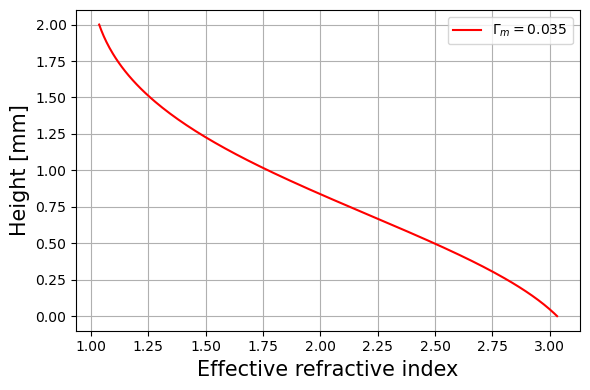

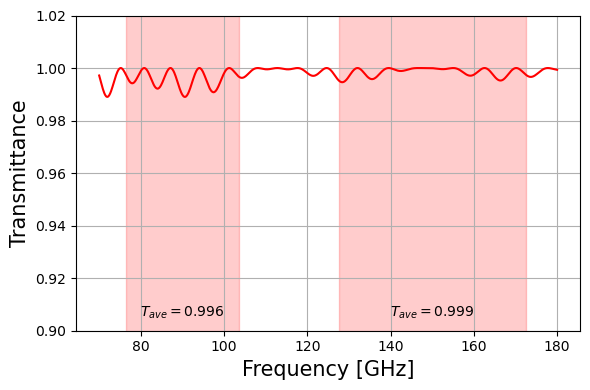

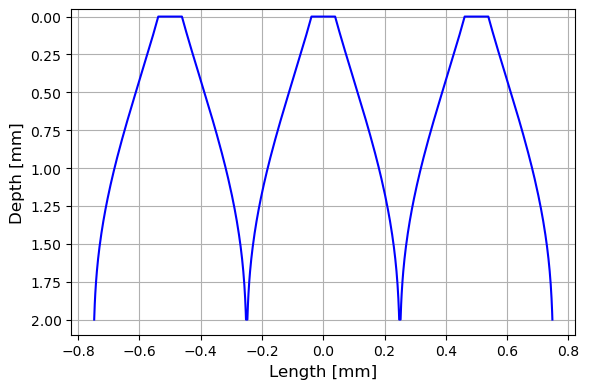

SWS contour...:   0%|          | 0/201 [00:00<?, ?it/s]

RCWA input...:   0%|          | 0/201 [00:00<?, ?it/s]

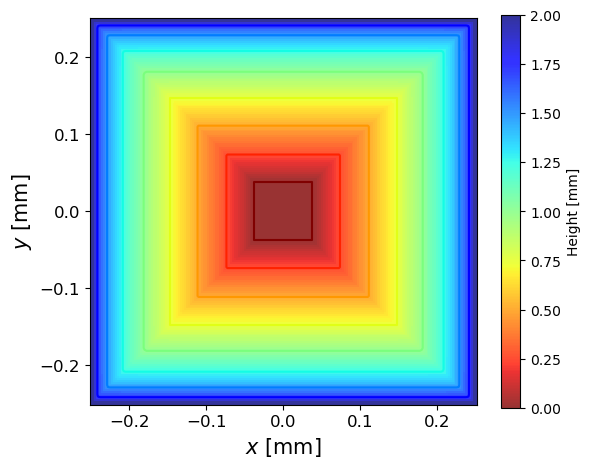

In [3]:
# Call class
lib = sesws.Design_SWS()

freq = np.linspace(70,180,1001)*1e+9 # Frequency [Hz]
input_n = 3.14       # refractive index of material
input_losstan = 0    # loss tangent of material 
input_d = 5e-3       # Bulk thickness (un-machined part) [m]
p = 0.5e-3           # ptich of the structure [m]
center_freq = np.array([90,150])*1e+9 # Center frequency [Hz]
frac_band = np.array([0.3,0.3])       # Fractional bandwidth
bandwidth = lib.Find_bandwidth(center_freq,frac_band)  
# Calculate bandedge [Hz]
center_freq_entire_band = (bandwidth[0][0]+bandwidth[1][1])/2.   # Cetner frequency of entire frequency band [Hz]
xy_res = 201  # xy resolution for SWS
rcwa_dat_name = 'design_sws_No001' # file mane of SWS for RCWA input

# ===================================================
# Related parameters for optimization 
# ===================================================
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
z_res = 201   # Number of layer of the index profile  
h = 2.0e-3    # depth (height) of structure (= Klopfenstein index profile) [m]                 
Gamma = 0.035  # Gamma
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ===================================================

# Calculate transmittance incluce Klopfenstein profile on both sides (1D array of transmittance)
klop_n, klop_d, trans = lib.Calculate_transmittance_include_Klopfenstein_profile_on_both_sides(freq, input_n,input_losstan,input_d, h, z_res, Gamma,
                                                                                               Plot_klop_profile = True)
# Calcualte averaged transmittance (1D array of averaged transmittance)
trans_ave = lib.Calculate_band_average(freq,trans,bandwidth)
# Plot transmittance result calculated by EMT, if you want
lib.Plot_transmittance_EMT(freq,trans,trans_ave,bandwidth,center_freq)


width_arr = lib.Find_width(klop_n, 1.0, input_n, center_freq_entire_band, p)
# Plot cross section of design, if you want
lib.Plot_cross_section(width_arr,klop_d,p)

# Create 3D SWS
X,Y,Z = lib.SuperEllipse_hone(klop_d,width_arr[::-1]/2,width_arr[::-1]/2,np.ones(len(width_arr))*300,np.ones(len(width_arr))*300,p/2, xy_res, Plot = True)

# save SWS as dat file for RCWA calculation
lib.Datwrite(rcwa_dat_name,Z,z_res)
